In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AffinityPropagation 
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
X = dataset.iloc[:, 3:5].values

In [7]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [8]:
data = pd.read_csv('Mall_Customers.csv').dropna().drop('CustomerID', axis=1)
features = ['Annual Income (k$)', 'Spending Score (1-100)'] 
X = data[features]

In [9]:
#normalize and standardise data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [10]:
clustering=AffinityPropagation(random_state=5).fit(X_std)
print(clustering.labels_)
print(len(clustering.cluster_centers_indices_))

[ 2  1  0  1  2  1  0  1  0  1  0  1  0  1  0  1  2  1  2  1  2  1  0  1
  0  1  2  3  2  1  0  1  0  1  0  1  0  1  2  1  2  1  2  3  2  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  4  5  5  4
  4  4  5  4  5  4  4  4  4  5  4  4  5  4  4  4  5  5  4  4  5  4  5  4
  4  5  4  7  5  8  5  7  6  8  6  8  5  8  6  7  6  8  6  8  6  7  5  7
  6  7  5  8  6  7  6  7  6  8  6  7  6  8  6  8  5  7  6  7  6  8  6  7
 10  8  6  8  6  7  6  7  6  8 10  9 10  9 10  9 10  9 10  9 10  9 10  9
 10  9 10  9 10  9 10  9]
11


In [11]:
silhouette_score=metrics.silhouette_score(X_std,clustering.labels_)
print('Silhouette Score:' , silhouette_score)
calinski_harabasz_score=metrics.calinski_harabasz_score(X_std, clustering.labels_)
print('Calinski-Harabasz Index: ', calinski_harabasz_score)

Silhouette Score: 0.43209716139778903
Calinski-Harabasz Index:  265.0770827611982


In [12]:
preference=-2
clustering=AffinityPropagation(preference=preference, random_state=5, damping=0.9).fit(X_std)
print('Preference Value:', preference)
print("Number of Clusters:", len(set(clustering.labels_)))

Preference Value: -2
Number of Clusters: 13


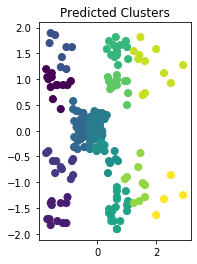

In [15]:
cmap = 'viridis'
plt.subplot(1,2,1)
plt.scatter(X_std[:, 0], X_std[:, 1], c=clustering.labels_, cmap=cmap, s=50)
plt.title('Predicted Clusters')
plt.show()

In [18]:
supervised=dataset

In [19]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
supervised['Cluster_group']=clustering.labels_

In [26]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,11
196,197,Female,45,126,28,12
197,198,Male,32,126,74,11
198,199,Male,32,137,18,12


In [27]:
supervised.to_csv("cluster.csv",index=False)

In [28]:
dir(AffinityPropagation)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'fit',
 'fit_predict',
 'get_params',
 'predict',
 'set_params']

In [39]:
supervised.columns[3]

'Annual Income (k$)'

In [40]:
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

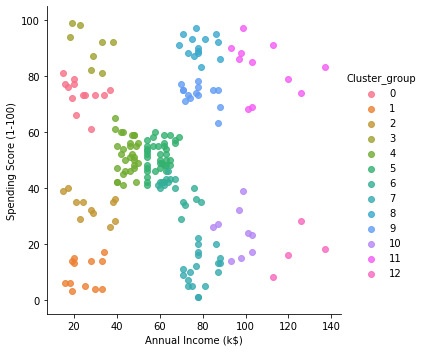

In [41]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

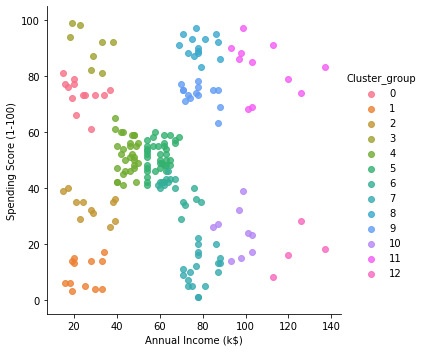

In [42]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False,legend_out=True)